Example usage for pyJHTDB.

In [1]:
%matplotlib inline
import numpy as np
import pyJHTDB

I'm going to create a 2D grid of points, and then get the values of the velocity at those points.
Note that the points must be in single precision if they are to be used for any getData call.

In [2]:
t = np.linspace(0, 1, 64)
x = np.zeros((t.shape[0], t.shape[0], 3), np.float32)
x[:, :, 0] = t[np.newaxis, :]
x[:, :, 1] = t[:, np.newaxis]
x[:, :, 2] = .0

Since the dataset I'm gonna use is the isotropic turbulence dataset, it doesn't really matter what value I choose for the z coordinates, if it's fixed.
Not for this simple example anyway.

The next step is to generate a libJHTDB object, connect it to the database, and use it to read the data that we need.
I'm using 4th order Lagrange interpolation (that's the `sinterp = 4` line), and for now we need to specify the actual number corresponding to that (you can find all the different codes in turblib.h from the C package).

In [3]:
lJHTDB = pyJHTDB.libJHTDB()
lJHTDB.initialize()

import pyJHTDB.dbinfo
T = pyJHTDB.dbinfo.isotropic1024coarse['time'][-1]

u = lJHTDB.getData(
               np.random.random()*T,
               x,
               sinterp = 4,
               getFunction='getVelocity')
lJHTDB.finalize()

Now we have the velocity stored in u, and we're gonna compute the energy and make a nice plot of it.

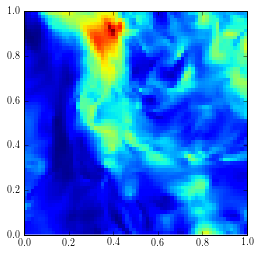

In [5]:
e = np.sum(u**2, axis = 2)

import matplotlib.pyplot as plt
plt.imshow(e,
           extent = [t[0], t[-1] - t[0], t[0], t[-1] - t[0]],
           interpolation = 'none')